In [38]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from cooc import *
from pickle_vocab import *
from preprocessing import pre_process

In [40]:
with open('twitter-datasets/train_pos.txt') as f:
    pos = f.readlines()

In [41]:
with open('twitter-datasets/train_neg.txt') as f:
    neg = f.readlines()

In [42]:
train=pos+neg

In [43]:
train_target=[':)']*len(pos)+[':(']*len(neg)

In [44]:
full_train={'data':train,
           'target':train_target}
full_train=pd.DataFrame(full_train)
full_train.sample(5)

,data,target
90933,conserve water .. shower together\n,:)
145544,the wounded healer : ministry in contemporary ...,:(
38802,<user> follow <user> & i'll give you a shoutout\n,:)
60770,i can't wait to see josh hutchsen on punk'd\n,:)
172335,<user> i'm still sick eh i'll go next time ......,:(


## Data pre-processing

In [45]:
full_train.data=pre_process(full_train.data)
full_train.sample(15)


,data,target
64416,those #sextherm boys are too freaky ! butt cut...,:)
142860,one direction - another world ( lyrics + pictu...,:(
136778,when the boy u like does not text u goodnight ...,:(
95901,followed please follow back,:)
72049,if anyone know where i can watch it then tell me,:)
179091,ca not get match of the day in toronto,:(
19970,want a follow back + a dm from me then follow ...,:)
80011,just tried on my birthday dress ca not bend ov...,:)
81203,okkk & oo willala who,:)
143367,om salad crackers and tiny bit of past and yog...,:(


In [46]:
##to be done on data with features
from sklearn.preprocessing import StandardScaler

def preprocess(data_X) :
    """
    Function:
            for each line in data X, there may be different sizes of features, so normalization is needed for the 
            further methods
    """
    
    x=data_X.copy()
    x=np.array(x)
    

    if x.shape[0] > 1 : 
        x = np.array([ StandardScaler().fit_transform(line) for line in x ])
    else :
        x = StandardScaler().fit_transform(x)
   
    return x

# Data exploration

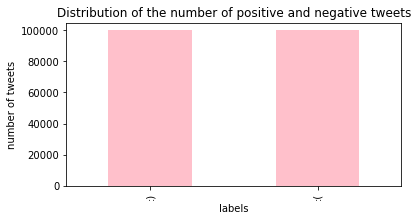

In [47]:
full_train['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 3))
plt.title("Distribution of the number of positive and negative tweets")
plt.ylabel("number of tweets")
plt.xlabel("labels")
plt.show()

The number of tweets per label (positive or negative) is the same. 

In [48]:
full_train.groupby('target').describe()

data                                                           
         count unique                                           top  freq
target                                                                   
:(      100000  91039    i just wrote this ( tell me what you think   335
:)      100000  90111  i love our fans ! there all so beautiful ! x  1536

As already stated above, there is the same number of positive and negative tweets (100'000). In both sets, we have some duplicated tweets as the number of unique tweets for **:(** and for **:)** labels is inferior to 100'000 and it seems that there are more duplicates for the **:)** label. Moreover, the two tweets (one per label) that are the most frequent, have frequency of 335 for **:(** and 1536 for **:)**.  

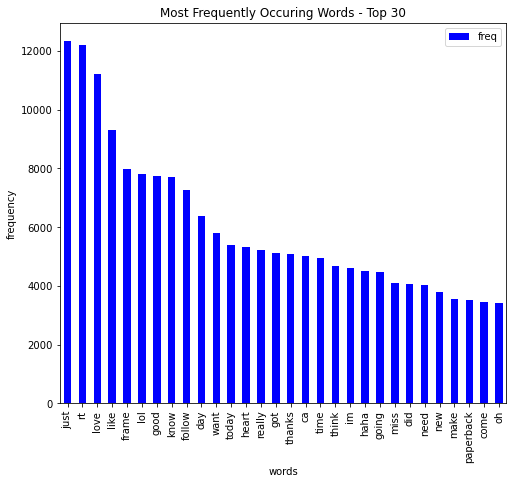

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

##Let's have a look at the words
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(full_train.data)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(8, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

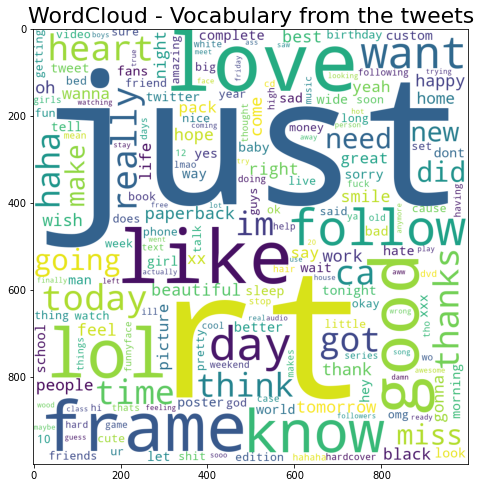

In [50]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from the tweets", fontsize = 22)
plt.show()

#### Split the data

In [51]:
from sklearn.model_selection import train_test_split

train , test=train_test_split(full_train)
train.reset_index(inplace=True)
test.reset_index(inplace=True)

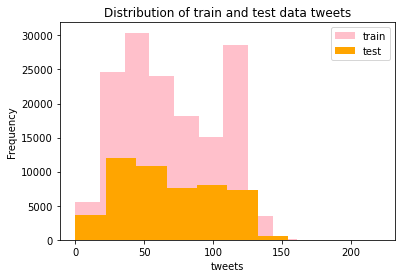

In [52]:
length_train = train['data'].str.len().plot.hist( color = 'pink', figsize = (6, 4), label="train")
length_test = test['data'].str.len().plot.hist(test, color = 'orange', figsize = (6, 4), label="test")
plt.legend(loc='upper right')
plt.xlabel("tweets")
plt.title("Distribution of train and test data tweets")
plt.show()

### Trying models Alex (doesn't work because of float)


In [18]:
maxs = []
for elem in train:
    maxs.append(len(elem.split(" ")))
max_ = max(maxs)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train.data, train.target, test_size = 0.25, random_state = 42)
#train.data, test.data, train.target ...

AttributeError: 'list' object has no attribute 'data'

In [99]:
def create_sequences(max_, train, test):
    # fit train words to tokenizer
    tokenizer.fit_on_texts(train)
    # get words and their indexes
    word_index = tokenizer.word_index
    # number of words
    nb_word = len(word_index)
    print(nb_word)
    # transform text to sequence
    X_sequences = tokenizer.texts_to_sequences(train)
    test_sequences = tokenizer.texts_to_sequences(test)
    
    # Pad sequences
    X_sequences = sequence.pad_sequences(X_sequences, maxlen=30,padding='pre')
    test_sequences = sequence.pad_sequences(test_sequences, maxlen=30,padding='pre')

    # create y, first pos then neg
    train_size = len(train)
    y = np.array(int(train_size/2) * [1] + int(train_size/2) * [0])

    # create indices 
    indices = np.arange(X_sequences.shape[0])
    np.random.shuffle(indices)
    X_sequences = X_sequences[indices]
    y = y[indices]
    print("Sequences created!") 
    return X_sequences, test_sequences, y, nb_word, word_index


X_sequences, test_sequences, y, nb_word, word_index = create_sequences(max_,train, test)

NameError: name 'tokenizer' is not defined

In [20]:
def create_glove_matrix(word_embedding, train, nb_word):
    '''
    This method creates an embedding matrix from a dict passed in argument
    '''
    X_splitted = [x.split() for x in train]

    glove_matrix = np.zeros((nb_word + 1, 200))
    for word, i in word_index.items():
        embedding_vector = word_embedding.get(word.encode())
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            glove_matrix[i] = embedding_vector
    print('Matrix created')
    
    return glove_matrix

In [23]:
glove_matrix = create_glove_matrix(glove_template.row, train ,nb_word)

NameError: name 'glove_template' is not defined

In [63]:
# tokenizing the words present in the training set
tokenized_tweet = train['data'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['data']), epochs=20)

(34440803, 47185960)

In [28]:
#Other way of splitting
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train.data, train.target, test_size = 0.25, random_state = 42)
#train.data, test.data, train.target, test.target
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(112500,)
(37500,)
(112500,)
(37500,)


## Trying something with the file generated from glove_template

In [53]:
#loading the embeddings
embedding = np.load('embeddings.npy')
embedding

array([[-0.47068856, -0.42937038,  0.02170492, ..., -0.09770838,
         0.35472091,  0.11893299],
       [-0.61624965, -0.58706598,  0.08510698, ..., -0.11690154,
         0.45551266,  0.13181864],
       [-0.69181935, -0.6715891 ,  0.07874796, ..., -0.12523874,
         0.49049136,  0.15597896],
       ...,
       [ 0.00264222, -1.14209513, -0.86794315, ..., -0.12426021,
        -1.74095668,  0.460644  ],
       [ 0.49914692, -0.62756239,  0.56450173, ..., -0.20703942,
        -2.33279345,  0.44107407],
       [-1.35520803,  1.16965326, -0.05468321, ...,  1.00357332,
        -0.5946019 ,  0.32829999]])

In [54]:
#Associate embedding with vocab words: 
vocab = pickle.load(open('vocab.pkl', "rb")) #this file was generated by executing vocab.sh
word_embedding = {}
for key in vocab.keys():
    word_embedding[key] = embedding[vocab.get(key)] #keys in this dict are not encoded 

In [55]:
word_embedding_ = pd.DataFrame(word_embedding).T
word_embedding_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
<user>,-0.470689,-0.429370,0.021705,-0.368589,-0.177399,0.034655,0.109570,-0.335244,-0.270718,-0.160504,-0.223900,0.293041,-0.440629,0.233860,-0.129511,-0.076188,-0.255257,-0.097708,0.354721,0.118933
!,-0.616250,-0.587066,0.085107,-0.486272,-0.242031,0.045864,0.113566,-0.418546,-0.359647,-0.186834,-0.295706,0.389601,-0.557826,0.328993,-0.153676,-0.059915,-0.281517,-0.116902,0.455513,0.131819
i,-0.691819,-0.671589,0.078748,-0.519284,-0.304898,0.070774,0.127582,-0.499825,-0.435917,-0.192106,-0.358938,0.468320,-0.633519,0.361838,-0.192723,-0.089398,-0.328476,-0.125239,0.490491,0.155979
the,-0.406457,-0.366836,0.032391,-0.295383,-0.156087,0.048262,0.078978,-0.297056,-0.227945,-0.170265,-0.236113,0.287029,-0.320389,0.197874,-0.087243,-0.009695,-0.189658,-0.036818,0.275097,0.084455
.,-0.513452,-0.468372,0.046384,-0.360135,-0.170166,0.056834,0.099085,-0.375838,-0.323186,-0.134347,-0.271697,0.337643,-0.448812,0.255326,-0.136528,-0.017966,-0.249670,-0.083487,0.321111,0.124893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#24,0.138022,1.038530,0.146346,0.191956,-1.602557,-1.915613,-1.130320,-0.264060,0.114430,-1.024489,2.265120,1.720008,0.397524,-0.414567,0.117584,-1.934871,1.528276,-0.833664,2.118388,-0.022775
#20,-1.614414,-0.710600,-0.949112,-0.040705,-1.095943,-0.716248,-1.587979,0.344480,-1.995898,-0.179903,-0.722912,0.613353,0.109246,-1.138783,-0.342118,0.207390,0.390366,-1.135263,-0.163523,0.011512
#1dsongconcept,0.002642,-1.142095,-0.867943,-0.064457,-2.429539,-1.177001,0.630757,0.760725,-0.287417,-0.521506,-0.757341,0.742558,-1.328287,-0.192297,-0.496050,0.302851,-1.694517,-0.124260,-1.740957,0.460644
#18,0.499147,-0.627562,0.564502,1.926809,0.167542,-0.613368,-0.502076,0.897998,-1.798745,0.916235,1.137885,0.186417,-0.212522,-1.641508,0.439617,-0.602676,-0.288914,-0.207039,-2.332793,0.441074


In [13]:
def average_word_vectors(tweets ,word_embedding):
    
    error = 0
    avg_word_vectors = np.zeros((len(tweets), word_embedding.shape[1] ))
    for i, tweet in enumerate(tweets):
        
        split_tweet = tweet.split()
        nb_words = 0
        
        for word in split_tweet:
            try:
                avg_word_vectors[i] += word_embedding.loc[word].to_numpy()
                nb_words += 1

            except KeyError: 
                continue
        if (nb_words != 0):
            avg_word_vectors[i] /= nb_words
        
    return avg_word_vectors

In [14]:
avg_word_vectors = average_word_vectors(train.data ,word_embedding_)
avg_word_vectors_df = pd.DataFrame(avg_word_vectors)
avg_word_vectors_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.206964,0.197742,-0.837443,0.127642,-0.116621,0.268742,0.524236,0.187829,-0.169643,-0.306832,0.502367,0.451355,0.294761,0.113921,0.250484,-0.383115,-0.192277,0.208148,-0.559468,-0.142379
1,0.322271,0.106112,-0.186464,0.238629,0.248216,0.123336,0.377024,-0.116212,-0.205158,0.372740,0.388892,0.192553,0.479148,0.066553,0.512152,-0.145130,-0.433705,0.517510,-0.298566,0.205478
2,0.142461,0.258732,-0.754690,0.069639,-0.088753,0.278351,0.555143,0.360685,-0.358820,0.081826,0.270155,0.383744,0.414867,0.083621,0.341114,-0.450321,-0.343597,0.243709,-0.305960,-0.101198
3,0.425657,0.069589,-0.838147,0.196898,-0.241744,0.391794,0.267086,0.181363,-0.007131,0.210254,0.303440,0.182089,0.382356,-0.022874,0.084990,-0.404138,-0.375570,0.220303,-0.318657,0.179322
4,0.244734,0.142976,-0.817815,0.199929,-0.037102,0.445773,0.476854,0.215169,-0.267745,-0.054347,0.381742,0.439492,0.319861,0.202432,0.317333,-0.434635,-0.312851,0.168649,-0.605400,-0.052167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.158780,0.296619,-0.521237,-0.102744,-0.271508,0.185736,0.623074,0.395204,-0.472845,-0.323941,0.300681,0.053343,0.321078,-0.195804,0.133260,-0.206107,-0.224046,0.213014,-0.126265,-0.024866
149996,0.267882,0.237692,-0.875887,0.165691,-0.176441,0.502351,0.446724,0.248120,-0.247239,-0.134856,0.462976,0.325735,0.303859,0.114473,0.264290,-0.397992,-0.246975,0.236244,-0.489586,-0.101446
149997,0.145072,0.250451,-0.978008,0.101192,-0.146465,0.555763,0.491331,0.296154,-0.280756,-0.171008,0.439709,0.421699,0.330394,0.111860,0.297815,-0.473534,-0.343190,0.227160,-0.443081,-0.152376
149998,0.303377,0.265645,-0.670257,0.185707,-0.149396,0.513282,0.508041,0.294621,-0.204098,-0.068096,0.518462,0.423023,0.230124,0.168621,0.145526,-0.334149,-0.282014,0.112405,-0.375522,-0.211288


In [15]:
#Associate tweets with the average word vectors of each tweet
sample_train_word_vectors= train.join(avg_word_vectors_df)
sample_train_word_vectors

,index,data,target,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,46628,<user> you starting to use twitter more\n,:),0.206964,0.197742,-0.837443,0.127642,-0.116621,0.268742,0.524236,...,0.502367,0.451355,0.294761,0.113921,0.250484,-0.383115,-0.192277,0.208148,-0.559468,-0.142379
1,116632,precision brand woodruff key assortment ( 250 ...,:(,0.322271,0.106112,-0.186464,0.238629,0.248216,0.123336,0.377024,...,0.388892,0.192553,0.479148,0.066553,0.512152,-0.145130,-0.433705,0.517510,-0.298566,0.205478
2,158650,<user> apparently you don't and never knew i w...,:(,0.142461,0.258732,-0.754690,0.069639,-0.088753,0.278351,0.555143,...,0.270155,0.383744,0.414867,0.083621,0.341114,-0.450321,-0.343597,0.243709,-0.305960,-0.101198
3,43592,he wass good to\n,:),0.425657,0.069589,-0.838147,0.196898,-0.241744,0.391794,0.267086,...,0.303440,0.182089,0.382356,-0.022874,0.084990,-0.404138,-0.375570,0.220303,-0.318657,0.179322
4,111290,i tot ' my dad is sending u home ytd so i was ...,:(,0.244734,0.142976,-0.817815,0.199929,-0.037102,0.445773,0.476854,...,0.381742,0.439492,0.319861,0.202432,0.317333,-0.434635,-0.312851,0.168649,-0.605400,-0.052167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,170807,<user> join the club\n,:(,-0.158780,0.296619,-0.521237,-0.102744,-0.271508,0.185736,0.623074,...,0.300681,0.053343,0.321078,-0.195804,0.133260,-0.206107,-0.224046,0.213014,-0.126265,-0.024866
149996,107737,i eat like a two year old\n,:(,0.267882,0.237692,-0.875887,0.165691,-0.176441,0.502351,0.446724,...,0.462976,0.325735,0.303859,0.114473,0.264290,-0.397992,-0.246975,0.236244,-0.489586,-0.101446
149997,85379,last night > > > early this morning > > >\n,:),0.145072,0.250451,-0.978008,0.101192,-0.146465,0.555763,0.491331,...,0.439709,0.421699,0.330394,0.111860,0.297815,-0.473534,-0.343190,0.227160,-0.443081,-0.152376
149998,105631,<user> 4d tour is now over most amazing tour e...,:(,0.303377,0.265645,-0.670257,0.185707,-0.149396,0.513282,0.508041,...,0.518462,0.423023,0.230124,0.168621,0.145526,-0.334149,-0.282014,0.112405,-0.375522,-0.211288


In [16]:
#sample_train_word_vectors = pd.concat([train, avg_word_vectors_df],axis=1)

In [17]:
X_train = sample_train_word_vectors.drop(columns=["data","target","index"])

In [18]:
Y_train = sample_train_word_vectors.target


In [19]:
avg_word_vectors_test_df = pd.DataFrame(average_word_vectors(test.data ,word_embedding_))

In [20]:
sample_test_word_vectors=test.join(avg_word_vectors_test_df)
X_test = sample_test_word_vectors.drop(columns=["data","target", "index"])
Y_test = sample_test_word_vectors.target

### Training models with glove 

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [161]:
linear_reg = LogisticRegression()
linear_reg = linear_reg.fit(X_train, Y_train)
y_pred = linear_reg.predict(avg_word_vectors_test_df)
print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

Training Accuracy : 0.5046933333333333
Validation Accuracy : 0.47056


In [160]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))


# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.5046933333333333
Validation Accuracy : 0.47056
[[14169 10733]
 [15739  9359]]


In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf_svm = Pipeline([('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, max_iter=1000, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, Y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == Y_test)

0.5718

In [22]:
from sklearn.svm import SVC

clf = SVC(cache_size=1000)
clf.fit(X_train, Y_train)
SVC()

SVC()

In [23]:
pred=clf.predict(X_test)

In [24]:
np.mean(pred == Y_test)

0.62534

In [42]:
def init_target(i):
    if i == ':)':
        i = 1
    elif i== ':(':
        i = -1
    return i

In [43]:
Y_train_init=[]

for i in range (len(Y_train)):
    Y_train_init.append(init_target(Y_train[i]))

In [46]:
Y_test_init=[]

for i in range (len(Y_test)):
    Y_test_init.append(init_target(Y_test[i]))

In [50]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(X_train, Y_train_init)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train_init))
print("Validation Accuracy :", model.score(X_test, Y_test_init))

# confusion matrix
#cm = confusion_matrix(test.target, y_pred)
#print(cm)

Training Accuracy : 0.9996666666666667
Validation Accuracy : 0.65348


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train_init)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train_init))
print("Validation Accuracy :", model.score(X_test, Y_test_init))

Training Accuracy : 0.5943733333333333
Validation Accuracy : 0.59606


In [55]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [56]:
class_weight = compute_class_weight(
    class_weight='balanced', classes=[":)",":("], y=Y_train
)
class_weight

array([1.00072052, 0.99928052])

In [ ]:
clf = SVC(class_weight={":)":class_weight[0], ":(":class_weight[1]})
# train the model
clf.fit(X_train, Y_train)
# use the model to predict the testing instances
y_pred = clf.predict(np.array(X_test))
# generate the classification report
print(classification_report(y_test, y_pred))

### Create submission

In [29]:
with open('twitter-datasets/test_data.txt') as f:
    real_test = f.readlines()
real_test={'data':real_test}
real_test=pd.DataFrame(real_test)

**test data pre-processing:**

In [30]:
real_test.data=pre_process(real_test.data)
real_test.sample(15)

,data
9713,9714 late night call from my favorite californ...
5642,5643 soo i stayed home could not even walk and...
6837,6838 being respected is more important than be...
5656,5657 hp g60 - 619ca black uk replacement lapto...
5706,5707 watching my nephew so my sis can run arrends
2340,2341 i know i am not perfect but i do not thin...
2185,2186 so very painful but at least we get a lun...
8636,8637 13x25 custom picture frame / poster frame...
1887,1888 nope i cried when i did not get tickets h...
1741,1742 last time i asked 2 my self why u dont fo...


In [31]:
import re
ids=[]   
for i in range (len(real_test)):
    text=real_test[i]
    found=re.findall('\d+', text )
    ids.append(found[0])

KeyError: 0

In [71]:
import csv

def create_csv_submission(ids, y_pred, name):
    """
    Creates an output file in .csv format for submission to Kaggle or AIcrowd
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            if (r2==':)'):
                r2=1
                writer.writerow({'Id':int(r1),'Prediction':r2})
            if(r2==':('):
                r2=-1
                writer.writerow({'Id':int(r1),'Prediction':r2})

In [ ]:
OUTPUT_PATH = 'sample_submission.csv' # TODO: fill in desired name of output file for submission
#weights, loss=ridge_regression(y_train, x_train, best_lambda)
#y_pred = text_clf_svm.predict(real_test)
create_csv_submission(ids, y_pred, OUTPUT_PATH)